In [1]:
%matplotlib inline

Enter the val;ue of I =0.34


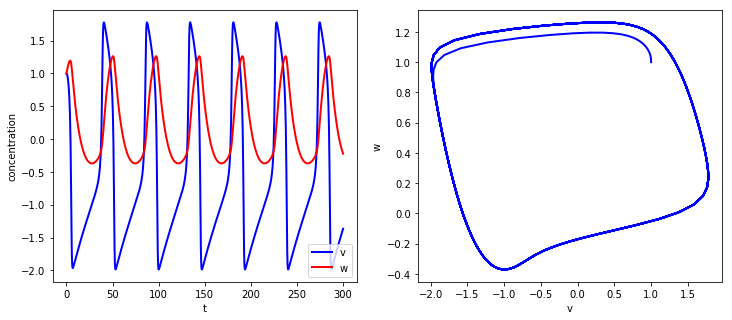

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
%**************************************************************************
%*     Problem 5.2                                                        *
%*     filename: problem05_2.py                                           *
%*     Programed by Ryoichi Kawai for Computational Physics Course        *
%*     Revised on 02/09/2017.                                             *
%**************************************************************************
"""
import numpy as np
import matplotlib.pyplot as plt

# Get the value of I
# Somewhere between I=0.3241 and 0.3242, there is a bifurcation.
I=np.float(input('Enter the value of I ='))

def fv(v,w):
    return v-v**3/3.0-w+I
    
def fw(v,w):
    a=0.08
    b=0.7
    c=0.8
    return a*(v+b-c*w)
    
# duration 
tmax=300.
# number of integration steps
N=1000
# step size
h=tmax/N

#set up arrays
t=np.linspace(0.,tmax,N+1)
v=np.zeros(N+1)
w=np.zeros(N+1)

#initial conditions
v[0]=1.
w[0]=1.

for n in range(0,N): 
    # 4th-order Runge-Kutta
    kv1=fv(v[n],w[n])
    kw1=fw(v[n],w[n])
    
    v_mid = v[n]+kv1*h/2.
    w_mid = w[n]+kw1*h/2.
    kv2 = fv(v_mid,w_mid)
    kw2 = fw(v_mid,w_mid)
      
    v_mid = v[n]+kv2*h/2.
    w_mid = w[n]+kw2*h/2.
    kv3 = fv(v_mid,w_mid)
    kw3 = fw(v_mid,w_mid)

    v_end = v[n]+kv3*h
    w_end = w[n]+kw3*h
    kv4 = fv(v_end,w_end)
    kw4 = fw(v_end,w_end)
    
    v[n+1]=v[n]+(kv1+2.0*(kv2+kv3)+kv4)*h/6.
    w[n+1]=w[n]+(kw1+2.0*(kw2+kw3)+kw4)*h/6.


# plot individual trajectories
plt.figure(figsize=(12,5))
plt.subplot(1,2,1);
plt.plot(t,v,'-b',linewidth=2,label='v')
plt.plot(t,w,'-r',linewidth=2,label='w')
plt.xlabel('t')
plt.ylabel('concentration')
plt.legend(loc=4)

# plot phase trajectory
plt.subplot(1,2,2)
plt.plot(v,w,'-b',linewidth=2)
plt.xlabel('v')
plt.ylabel('w')

plt.show()